<a href="https://colab.research.google.com/github/aplibranza/Data-Visualization-/blob/main/From_Chart_to_Stories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Bar Chart: Not Just Sales Numbers, But Investment Decisions

Let’s create a sample dataset for your GCash cash-in partners, plus Python code you can run (e.g., in Jupyter Notebook, Google Colab, or any Python IDE) to generate the bar chart.

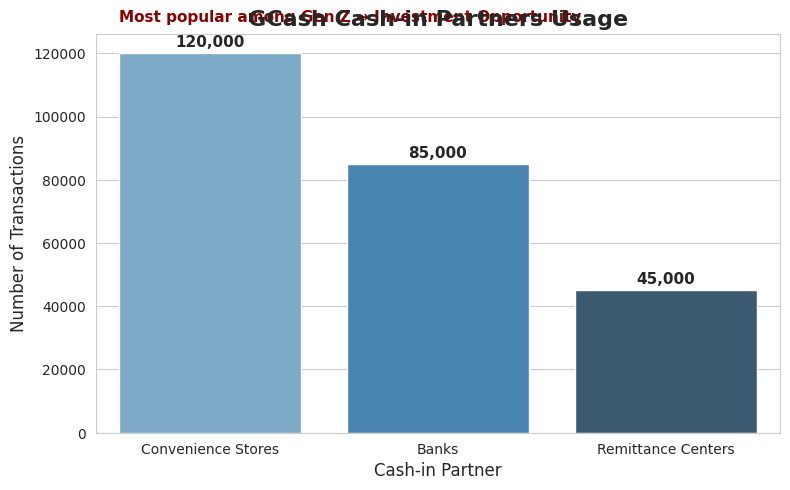

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    "Partner": ["Convenience Stores", "Banks", "Remittance Centers"],
    "Transactions": [120000, 85000, 45000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set style
sns.set_style("whitegrid")

# Create barplot with hue assigned
plt.figure(figsize=(8,5))
barplot = sns.barplot(
    x="Partner",
    y="Transactions",
    data=df,
    hue="Partner",
    palette="Blues_d",
    legend=False
)

# Add title and labels
plt.title("GCash Cash-in Partners Usage", fontsize=16, weight='bold')
plt.xlabel("Cash-in Partner", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)

# Annotate bars with values
for index, row in df.iterrows():
    plt.text(index, row.Transactions + 2000, f"{row.Transactions:,}",
             ha='center', fontsize=11, weight='bold')

# Add annotation for story (moved to top-left corner)
plt.text(-0.4, 130000,
         "Most popular among Gen Z → Investment Opportunity",
         ha="left", fontsize=11, color="darkred", weight="bold")

plt.tight_layout()
plt.show()


# 2. Scatter Plot: Not Just Correlation, But Levers of ROI
Let’s build a runnable Python example with a larger dataset for the GrabFood scatter plot. We’ll simulate customer orders with:

- Delivery Time (minutes)
- Customer Rating (1–5 stars)
- Order Accuracy (Yes/No → converted to 1/0)

This way, you’ll see both the relationship between delivery time and rating and the impact of order accuracy.

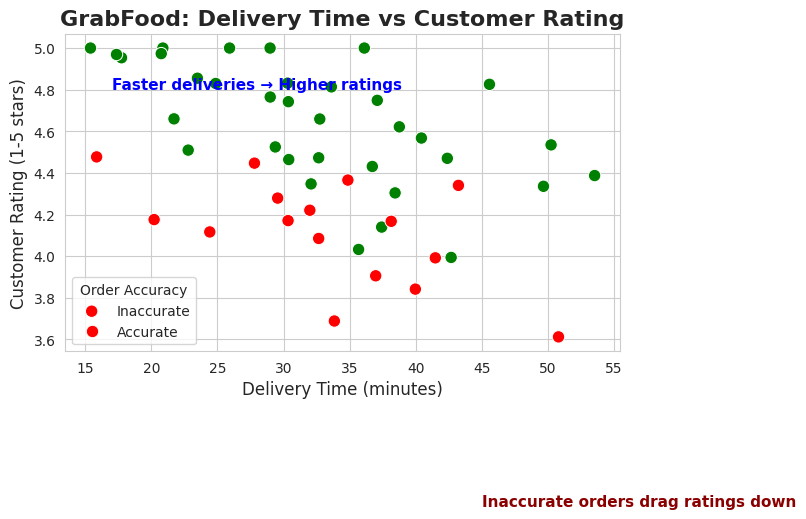

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Simulate data for 50 GrabFood orders
np.random.seed(42)

order_count = 50
delivery_time = np.random.normal(35, 10, order_count).clip(15, 60)   # delivery times between 15–60 mins
order_accuracy = np.random.choice([0, 1], size=order_count, p=[0.3, 0.7])  # 70% accurate orders

# Customer rating depends partly on delivery time + accuracy + some noise
customer_rating = (
    5
    - (delivery_time / 60) * 1.5      # longer delivery → lower rating
    + order_accuracy * 0.5            # accurate order → better rating
    + np.random.normal(0, 0.3, order_count)  # random noise
)
customer_rating = np.clip(customer_rating, 1, 5)

# Create DataFrame
df = pd.DataFrame({
    "OrderID": range(1, order_count+1),
    "DeliveryTime": delivery_time,
    "CustomerRating": customer_rating,
    "OrderAccuracy": order_accuracy
})

# Plot: Delivery Time vs Customer Rating
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="DeliveryTime",
    y="CustomerRating",
    hue="OrderAccuracy",
    palette={0:"red", 1:"green"},
    data=df,
    s=80
)

# Add title and labels
plt.title("GrabFood: Delivery Time vs Customer Rating", fontsize=16, weight="bold")
plt.xlabel("Delivery Time (minutes)", fontsize=12)
plt.ylabel("Customer Rating (1-5 stars)", fontsize=12)

# Annotation to tell the story
plt.text(17, 4.8, "Faster deliveries → Higher ratings", fontsize=11, color="blue", weight="bold")
plt.text(45, 2.8, "Inaccurate orders drag ratings down", fontsize=11, color="darkred", weight="bold")

plt.legend(title="Order Accuracy", labels=["Inaccurate", "Accurate"])
plt.tight_layout()
plt.show()


# 3. Heatmap: Not Just Colors, But Hidden Hotspots

Let’s make a realistic heatmap example for MoveIt, showing booking density across districts and times of day. This way you’ll see clear hotspots (e.g., near schools/universities at lunch).

/tmp/ipython-input-2731662726.py:48: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


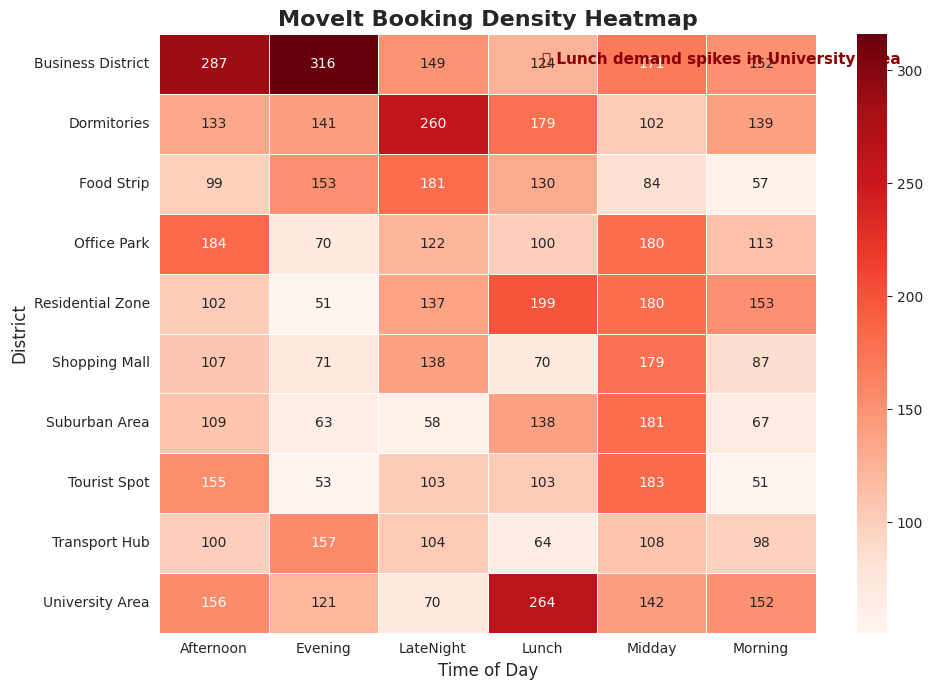

             District   TimeSlot  Bookings
0     University Area    Morning       152
1     University Area     Midday       142
2     University Area      Lunch       264
3     University Area  Afternoon       156
4     University Area    Evening       121
5     University Area  LateNight        70
6   Business District    Morning       152
7   Business District     Midday       171
8   Business District      Lunch       124
9   Business District  Afternoon       287
10  Business District    Evening       316
11  Business District  LateNight       149
12   Residential Zone    Morning       153
13   Residential Zone     Midday       180
14   Residential Zone      Lunch       199


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated data for 10 districts x 6 time slots
np.random.seed(42)
districts = [
    "University Area", "Business District", "Residential Zone", "Shopping Mall",
    "Transport Hub", "Office Park", "Suburban Area", "Dormitories",
    "Food Strip", "Tourist Spot"
]
time_slots = ["Morning", "Midday", "Lunch", "Afternoon", "Evening", "LateNight"]

# Generate base demand and add variations
data = []
for district in districts:
    for slot in time_slots:
        base = np.random.randint(50, 200)

        # Add realistic spikes
        if district == "University Area" and slot == "Lunch":
            base += 200  # spike during lunch
        if district == "Business District" and slot in ["Afternoon", "Evening"]:
            base += 150  # office workers after work
        if district == "Dormitories" and slot in ["LateNight"]:
            base += 100  # late-night student orders

        data.append([district, slot, base])

df = pd.DataFrame(data, columns=["District", "TimeSlot", "Bookings"])

# Pivot to heatmap format
pivot_df = df.pivot(index="District", columns="TimeSlot", values="Bookings")

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="Reds", linewidths=.5)

plt.title("MoveIt Booking Density Heatmap", fontsize=16, weight="bold")
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("District", fontsize=12)

# Storytelling annotation
plt.text(3.5, 0.5, "🔥 Lunch demand spikes in University Area",
         fontsize=11, color="darkred", weight="bold")

plt.tight_layout()
plt.show()

# Show first few rows of dataset
print(df.head(15))